# Anonymise and clean fresh-data.csv

### Requirements

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

# Get base dir
BASE_DIR = os.path.abspath("..")

# Set data folder name
data_folder = "data"

In [2]:
# Libraries
import pandas as pd
import seaborn as sns
import missingno as msno


# Functions
from utils import clean_and_save_csv, EDUCATION_MAP, SITUATION_FAMILIALE_MAP

2025-06-23 11:55:21.726902: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-23 11:55:21.729853: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-23 11:55:21.737051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750672521.750210  229082 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750672521.753873  229082 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750672521.764022  229082 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

### Call function to clean a csv

In [3]:
# Call function to clean a data set
clean_and_save_csv(
    'fresh-data.csv',
    columns_to_remove=["nom", "prenom", "sexe", "nationalité_franaise", "orientation_sexuelle"],
    columns_to_categorised={"niveau_etude": EDUCATION_MAP, "situation_familiale": SITUATION_FAMILIALE_MAP},
    columns_fillna_mean=["historique_credits","score_credit","loyer_mensuel"],
    columns_fillna_mode=["situation_familiale"],
    columns_outliers_filter=["loyer_mensuel", "revenu_estime_mois"]
)

CSV cleaned and saved in data directory


/home/thomas/atlas/projects/sql-alchemy/utils/csv_cleaner.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/home/thomas/atlas/projects/sql-alchemy/utils/csv_cleaner.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

## Display result

In [4]:
# Import csv file
data_file_path = os.path.join(BASE_DIR, data_folder, "clean-data.csv")
df = pd.read_csv(data_file_path)

df.head()

,age,taille,poids,sport_licence,niveau_etude,region,smoker,nationalité_francaise,nb_enfants,quotient_caf,revenu_estime_mois,situation_familiale,historique_credits,risque_personnel,date_creation_compte,score_credit,loyer_mensuel,montant_pret
0,19,175.0,62.5,non,4,Île-de-France,oui,oui,0,78.7,4958,3.0,2.50682,0.19,2021-04-04,574.779722,5306.473284,500.000000
1,68,174.6,66.5,oui,8,Auvergne-Rhône-Alpes,oui,oui,2,227.8,3758,3.0,2.50682,0.68,2024-08-27,576.000000,5306.473284,29093.676397
2,42,169.7,63.4,oui,7,Provence-Alpes-Côte d’Azur,non,non,2,19.5,2091,3.0,3.00000,0.92,2020-10-17,574.779722,5000.000000,500.000000
3,31,163.8,64.9,oui,8,Bretagne,oui,oui,1,238.7,1540,3.0,3.00000,0.90,2023-08-29,818.000000,5000.000000,22143.694141
4,63,165.0,56.9,oui,0,Hauts-de-France,oui,oui,0,290.4,1820,3.0,2.50682,0.43,2020-10-18,404.000000,5306.473284,500.000000


### Display empty columns

<Axes: >

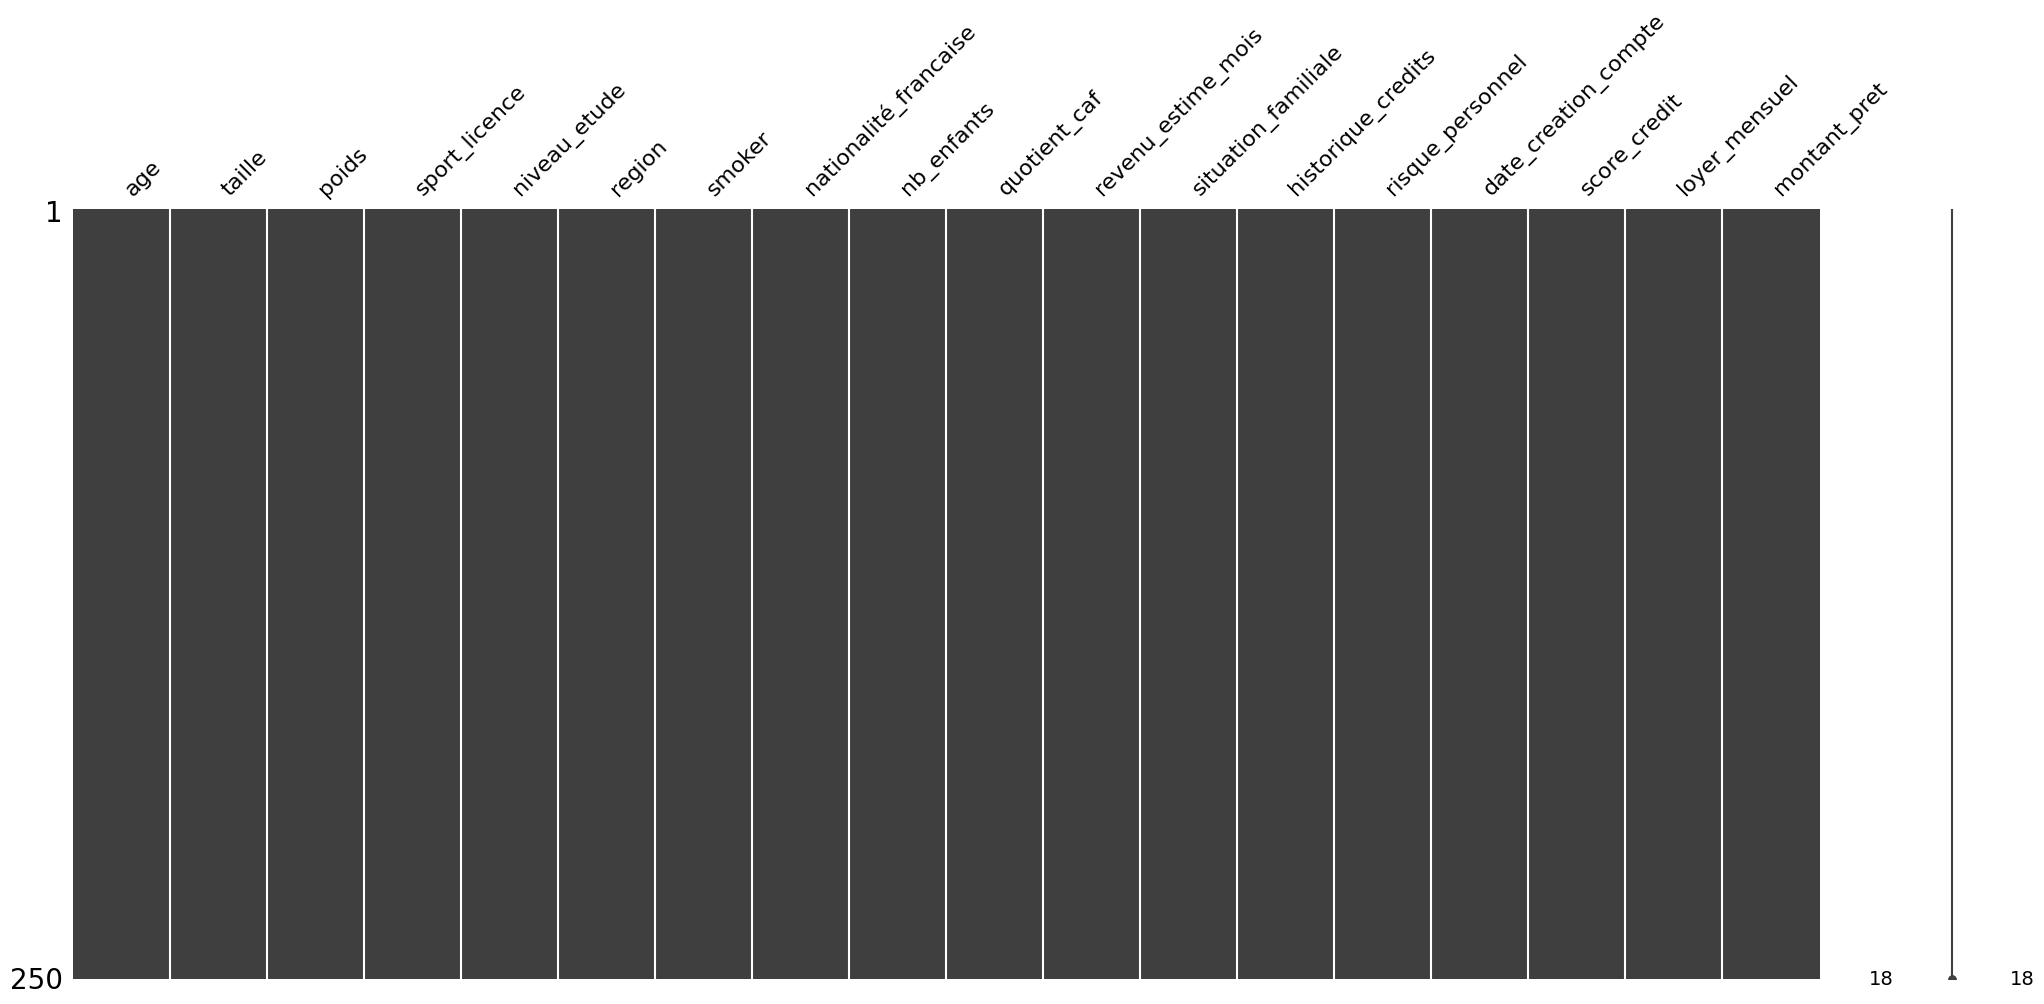

In [5]:
%matplotlib inline
msno.matrix(df.sample(250))

### Display outiliers

<Axes: xlabel='loyer_mensuel'>

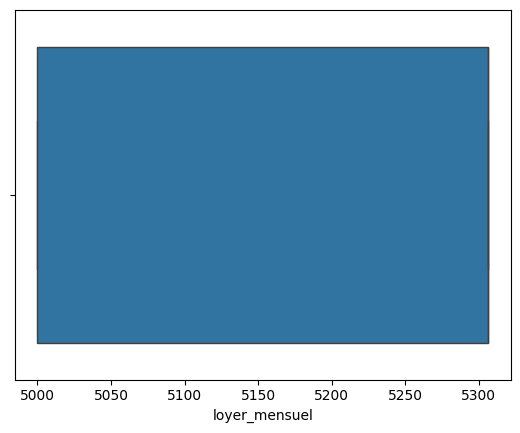

In [6]:
sns.boxplot(x=df["loyer_mensuel"])